## Lab: Using Callbacks

In [ ]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras

## Step 1 : Read Data & Shape Data

In [3]:
import os

# data_location_local = '../data/iris/keras/iris.csv'

data_location = "https://s3.amazonaws.com/elephantscale-public/data/iris/keras/iris.csv"
data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location)
iris = pd.read_csv(data_location_local)

iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

input_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = iris [input_columns]
y = iris[['Species']]

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y.values) ## need y.values which is an array


from sklearn.model_selection import train_test_split

# supply 'y1' (encoded labels)
x_train,x_test, y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=0) 


/home/ubuntu/apps/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Step 2 : Build the Model


In [4]:
def build_model():
    input_dim = len(input_columns)
    output_clases = 3 
#     print ("input_dim : ", input_dim, ", output classes : ", output_clases)

    model = tf.keras.Sequential([
                tf.keras.layers.Dense(units=64, activation=tf.nn.relu, input_dim=input_dim),
                tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
                tf.keras.layers.Dense(units=output_clases,  activation=tf.nn.softmax)
                ])

    # loss = 'sparse_categorical_crossentropy'  or 'categorical_crossentropy'
    model.compile(loss='sparse_categorical_crossentropy', 
                     optimizer='adam', metrics=['accuracy'])
    # print (model.summary())
    # tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)
    return model



## Step  : Train Without Any Callbacks

training starting ...
Epoch 1/100
3/3 [==============================] - 0s 113ms/step - loss: 1.7216 - accuracy: 0.2708 - val_loss: 1.2694 - val_accuracy: 0.4583
Epoch 2/100
3/3 [==============================] - 0s 73ms/step - loss: 1.3817 - accuracy: 0.4062 - val_loss: 1.1179 - val_accuracy: 0.2917
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1177 - accuracy: 0.3542 - val_loss: 1.0070 - val_accuracy: 0.2500
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.9581 - accuracy: 0.4792 - val_loss: 0.9297 - val_accuracy: 0.5417
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.8351 - accuracy: 0.7292 - val_loss: 0.8766 - val_accuracy: 0.5417
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.7570 - accuracy: 0.7292 - val_loss: 0.8512 - val_accuracy: 0.5417
Epoch 7/100
3/3 [==============================] - 0s 63ms/step - loss: 0.7018 - accuracy: 0.7292 - val_loss: 0.8269 - val_accuracy: 0.54

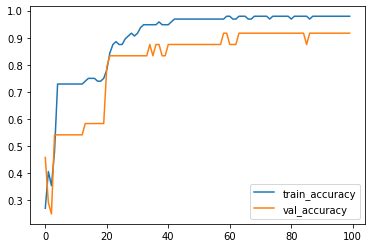

CPU times: user 1min 7s, sys: 1min 39s, total: 2min 46s
Wall time: 12.3 s


In [5]:
%%time

# clear any old stuff
# tf.keras.backend.clear_session()
## compile resets the model
model = build_model()

epochs = 100 

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1)

print ("training done.")

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step: Use Early Stopping Callback

- How many epochs is the training running for?
- What is the final accuracy?
- Play with the patience value to achieve deisred accuracy

In [26]:
cb_early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.1, patience=10)

training starting ...
Epoch 1/500
3/3 [==============================] - 0s 62ms/step - loss: 1.1641 - accuracy: 0.6354 - val_loss: 1.3058 - val_accuracy: 0.5417
Epoch 2/500
3/3 [==============================] - 0s 19ms/step - loss: 0.8844 - accuracy: 0.7292 - val_loss: 1.0131 - val_accuracy: 0.5417
Epoch 3/500
3/3 [==============================] - 0s 24ms/step - loss: 0.7644 - accuracy: 0.7292 - val_loss: 0.8294 - val_accuracy: 0.5417
Epoch 4/500
3/3 [==============================] - 0s 30ms/step - loss: 0.7132 - accuracy: 0.7604 - val_loss: 0.7561 - val_accuracy: 0.6667
Epoch 5/500
3/3 [==============================] - 0s 37ms/step - loss: 0.6909 - accuracy: 0.7708 - val_loss: 0.7382 - val_accuracy: 0.5417
Epoch 6/500
3/3 [==============================] - 0s 35ms/step - loss: 0.6520 - accuracy: 0.7396 - val_loss: 0.7351 - val_accuracy: 0.5417
Epoch 7/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6117 - accuracy: 0.7292 - val_loss: 0.7205 - val_accuracy: 0.541

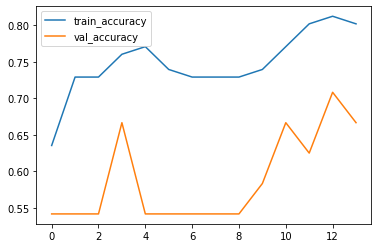

CPU times: user 10.6 s, sys: 14.6 s, total: 25.2 s
Wall time: 2.03 s


In [27]:
%%time

# clear any old stuff
# tf.keras.backend.clear_session()
model = build_model()

epochs = 500 

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1, 
              callbacks = [cb_early_stop])

print ("training done.")

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step : Implementing Custom Callback
In this section we are going to implement a custom call back to stop training when 80% accuracy is reached.


In [33]:
class MyCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    print ('\nMyCallback: on_epoch_end(), epoch={}, got logs: {}'.format(epoch, logs))
    if(logs.get('val_accuracy') > 0.8):
      print("\nMyCallback: Reached 80% accuracy so stopping training!")
      self.model.stop_training = True

training starting ...
Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 2.7201 - accuracy: 0.3750
MyCallback: on_epoch_end(), epoch=0, got logs: {'loss': 2.6308507919311523, 'accuracy': 0.2708333432674408, 'val_loss': 1.6007747650146484, 'val_accuracy': 0.4583333432674408}
3/3 [==============================] - 0s 79ms/step - loss: 2.6309 - accuracy: 0.2708 - val_loss: 1.6008 - val_accuracy: 0.4583
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 2.3843 - accuracy: 0.1875
MyCallback: on_epoch_end(), epoch=1, got logs: {'loss': 1.913769245147705, 'accuracy': 0.2708333432674408, 'val_loss': 1.1658107042312622, 'val_accuracy': 0.4583333432674408}
3/3 [==============================] - 0s 22ms/step - loss: 1.9138 - accuracy: 0.2708 - val_loss: 1.1658 - val_accuracy: 0.4583
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 1.3699 - accuracy: 0.3125
MyCallback: on_epoch_end(), epoch=2, got logs: {'loss': 1.3151785135269165, 'accuracy': 0.27

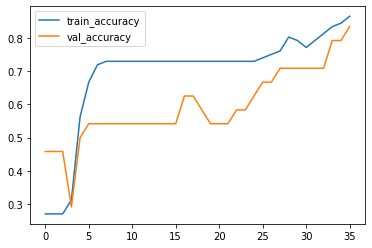

CPU times: user 24.1 s, sys: 34.2 s, total: 58.3 s
Wall time: 4.32 s


In [34]:
%%time

# clear any old stuff
# tf.keras.backend.clear_session()
model = build_model()

epochs = 500 

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1, 
              callbacks = [MyCallback()])

print ("training done.")

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 5 : Add Multiple Callbacks
In this lab, we will add tensorboard and our custom call back

In [35]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'callback1'
tb_top_level_dir= '/tmp/tensorboard-logs'
tb_app_dir = os.path.join (tb_top_level_dir, app_name)
tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))
print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, histogram_freq=1)

## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/callback1/00-44-20
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


training starting ...
Epoch 1/500
2/3 [===================>..........] - ETA: 0s - loss: 1.0392 - accuracy: 0.3906
MyCallback: on_epoch_end(), epoch=0, got logs: {'loss': 1.039343237876892, 'accuracy': 0.3854166567325592, 'val_loss': 1.0534945726394653, 'val_accuracy': 0.2916666567325592}
3/3 [==============================] - 0s 127ms/step - loss: 1.0393 - accuracy: 0.3854 - val_loss: 1.0535 - val_accuracy: 0.2917
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 1.0131 - accuracy: 0.3750
MyCallback: on_epoch_end(), epoch=1, got logs: {'loss': 0.9782803654670715, 'accuracy': 0.3958333432674408, 'val_loss': 1.0185357332229614, 'val_accuracy': 0.4583333432674408}
3/3 [==============================] - 0s 26ms/step - loss: 0.9783 - accuracy: 0.3958 - val_loss: 1.0185 - val_accuracy: 0.4583
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 0.9849 - accuracy: 0.5938
MyCallback: on_epoch_end(), epoch=2, got logs: {'loss': 0.9259565472602844, 'accuracy': 0.6

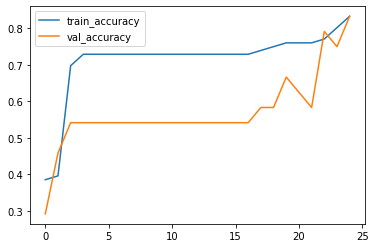

CPU times: user 18.4 s, sys: 26.5 s, total: 44.9 s
Wall time: 3.8 s


In [37]:
%%time

# clear any old stuff
# tf.keras.backend.clear_session()
model = build_model()

epochs = 500 

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1, 
              callbacks = [MyCallback(), tensorboard_callback])

print ("training done.")

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()